# WeatherPy
----

### Analysis
This sample data lacks cities located between latitude of -90 to -50.
* The weather becomes warmer as one approaches the equator. But the max temperatures of northern and southern hemispheres seem to be similar in respect to their latitudes.
* There is a cluster of cities with 100% humidity at latitudes of -20 to 0.
* There is no apprent relationship between latitude and cloudiness but many cities have 0 cloudiness.
* Wind speeds seem to increase from the equator.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df=pd.DataFrame(cities, columns=['City'])
cities_df.head()

,City
0,cherskiy
1,yellowknife
2,bredasdorp
3,hobart
4,pangody


In [111]:
cities_df['Country']=""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Date']=""
cities_df['Cloudiness']=""
cities_df['Humidity']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""

cities_df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,cherskiy,,,,,,,,
1,yellowknife,,,,,,,,
2,bredasdorp,,,,,,,,
3,hobart,,,,,,,,
4,pangody,,,,,,,,


# Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [112]:
weathers=[]

base_url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'

print('''Beginning Data Retrieval     
-----------------------------''')
Set_counter=1

for index, row in cities_df.iterrows():
    city=row['City']
    city_url=url + "appid=" + api_key + "&units=" + units + "&q=" + city
    response=requests.get(city_url).json()
    
    if (index % 50 == 0 and index>=50):
        Set_counter+=1
    
    try:
        print(f'Processing Record {index} of Set {Set_counter} | {city.title()}')

        cities_df.loc[index,'Country']=response['sys']['country']
        cities_df.loc[index,'Lat']=response['coord']['lat']
        cities_df.loc[index,'Lng']=response['coord']['lon']
        cities_df.loc[index,'Date']=response['dt']
        cities_df.loc[index,'Cloudiness']=response['clouds']['all']
        cities_df.loc[index,'Humidity']=response['main']['humidity']
        cities_df.loc[index,'Max Temp']=response['main']['temp_max']
        cities_df.loc[index,'Wind Speed']=response['wind']['speed']
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | Cherskiy
Processing Record 1 of Set 1 | Yellowknife
Processing Record 2 of Set 1 | Bredasdorp
Processing Record 3 of Set 1 | Hobart
Processing Record 4 of Set 1 | Pangody
Processing Record 5 of Set 1 | Hermanus
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Saint-Leu
Processing Record 8 of Set 1 | Lata
Processing Record 9 of Set 1 | Rungata
City not found. Skipping...
Processing Record 10 of Set 1 | Avarua
Processing Record 11 of Set 1 | Norman Wells
Processing Record 12 of Set 1 | Luanda
Processing Record 13 of Set 1 | Berlevag
Processing Record 14 of Set 1 | Albany
Processing Record 15 of Set 1 | Dobryatino
Processing Record 16 of Set 1 | Mount Gambier
Processing Record 17 of Set 1 | Benguela
Processing Record 18 of Set 1 | Dubbo
Processing Record 19 of Set 1 | Iqaluit
Processing Record 20 of Set 1 | Guanare
Processing Record 21 of Set 1 | Berdigestyakh
Processing Recor

Processing Record 180 of Set 4 | Asayita
City not found. Skipping...
Processing Record 181 of Set 4 | Butaritari
Processing Record 182 of Set 4 | Makakilo City
Processing Record 183 of Set 4 | Payakumbuh
Processing Record 184 of Set 4 | Santiago Del Estero
Processing Record 185 of Set 4 | Turukhansk
Processing Record 186 of Set 4 | Saleaula
City not found. Skipping...
Processing Record 187 of Set 4 | Upernavik
Processing Record 188 of Set 4 | Samarai
Processing Record 189 of Set 4 | Sao Joao Da Barra
Processing Record 190 of Set 4 | Hobyo
Processing Record 191 of Set 4 | Kungalv
Processing Record 192 of Set 4 | Cache Creek
Processing Record 193 of Set 4 | Eldorado
Processing Record 194 of Set 4 | Pipri
Processing Record 195 of Set 4 | Qaanaaq
Processing Record 196 of Set 4 | Lorengau
Processing Record 197 of Set 4 | Huarmey
Processing Record 198 of Set 4 | Sola
Processing Record 199 of Set 4 | Flin Flon
Processing Record 200 of Set 5 | Georgetown
Processing Record 201 of Set 5 | Lucheg

Processing Record 362 of Set 8 | Aksay
Processing Record 363 of Set 8 | Vardo
Processing Record 364 of Set 8 | Agva
City not found. Skipping...
Processing Record 365 of Set 8 | Colac
Processing Record 366 of Set 8 | Lewistown
Processing Record 367 of Set 8 | Karkaralinsk
City not found. Skipping...
Processing Record 368 of Set 8 | Gat
Processing Record 369 of Set 8 | Sinjai
Processing Record 370 of Set 8 | Klaksvik
Processing Record 371 of Set 8 | Kamenka
Processing Record 372 of Set 8 | Nayoro
Processing Record 373 of Set 8 | Tungor
Processing Record 374 of Set 8 | Bathsheba
Processing Record 375 of Set 8 | Lieksa
Processing Record 376 of Set 8 | Kuhdasht
Processing Record 377 of Set 8 | Najran
Processing Record 378 of Set 8 | Severo-Yeniseyskiy
Processing Record 379 of Set 8 | Burkhala
City not found. Skipping...
Processing Record 380 of Set 8 | Marcona
City not found. Skipping...
Processing Record 381 of Set 8 | Yulara
Processing Record 382 of Set 8 | Jaffna
Processing Record 383 of

Processing Record 539 of Set 11 | Peterhead
Processing Record 540 of Set 11 | Shache
Processing Record 541 of Set 11 | Solsvik
City not found. Skipping...
Processing Record 542 of Set 11 | Moree
Processing Record 543 of Set 11 | Wasilla
Processing Record 544 of Set 11 | Mount Isa
Processing Record 545 of Set 11 | Belmonte
Processing Record 546 of Set 11 | Srivardhan
Processing Record 547 of Set 11 | Feijo
Processing Record 548 of Set 11 | Anadyr
Processing Record 549 of Set 11 | Cagayan De Tawi-Tawi
City not found. Skipping...
Processing Record 550 of Set 12 | Necochea
Processing Record 551 of Set 12 | Aykhal
Processing Record 552 of Set 12 | Bandarbeyla
Processing Record 553 of Set 12 | Pemba
Processing Record 554 of Set 12 | Taburao
City not found. Skipping...
Processing Record 555 of Set 12 | Tumannyy
City not found. Skipping...
Processing Record 556 of Set 12 | Alotau
City not found. Skipping...
Processing Record 557 of Set 12 | Peniche
Processing Record 558 of Set 12 | Usinsk
Proc

In [113]:
# convert strings to float and drop missing values
cities_clean=cities_df.replace('', np.nan, inplace=False)
cities_clean=cities_clean.dropna(how='any')

cities_clean[['Cloudiness','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']].astype(float)

cities_clean.dtypes

City           object
Country        object
Lat           float64
Lng           float64
Date          float64
Cloudiness    float64
Humidity      float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
# Output File (CSV)
cities_clean.to_csv("cities.csv", index=False)

In [115]:
cities_clean.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,cherskiy,RU,68.75,161.30,1.553756e+09,32.0,58.0,2.15,6.51
1,yellowknife,CA,62.45,-114.38,1.553756e+09,90.0,92.0,21.99,9.17
2,bredasdorp,ZA,-34.53,20.04,1.553756e+09,36.0,77.0,66.20,8.05
3,hobart,AU,-42.88,147.33,1.553756e+09,0.0,40.0,73.00,12.75
4,pangody,RU,65.85,74.49,1.553756e+09,12.0,93.0,24.74,9.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

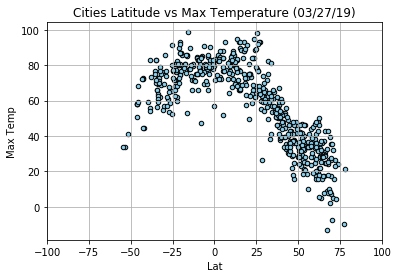

In [116]:
cities_clean.plot.scatter(x="Lat", y="Max Temp",
                          title="Cities Latitude vs Max Temperature (03/27/19)",
                          color="skyblue", edgecolor="Black",
                          grid=True)
plt.xlim(-100,100)
# Save figure
plt.savefig("Latitude_vs_MaxTemp.png")

#### Latitude vs. Humidity Plot

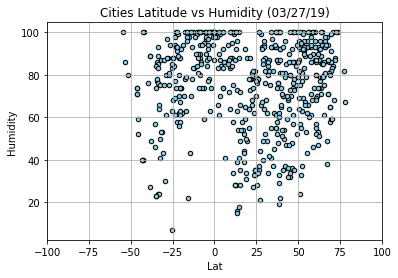

In [117]:
cities_clean.plot.scatter(x="Lat", y="Humidity",
                          title="Cities Latitude vs Humidity (03/27/19)",
                          color="skyblue", edgecolor="Black",
                          grid=True)
plt.xlim(-100,100)
# Save figure
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

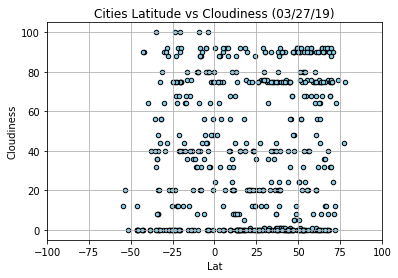

In [118]:
cities_clean.plot.scatter(x="Lat", y="Cloudiness",
                          title="Cities Latitude vs Cloudiness (03/27/19)",
                          color="skyblue", edgecolor="Black",
                          grid=True)
plt.xlim(-100,100)
# Save figure
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

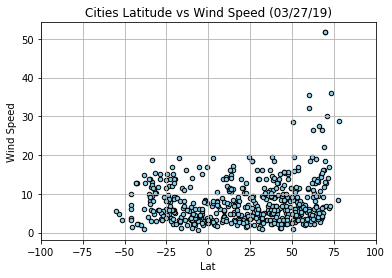

In [119]:
cities_clean.plot.scatter(x="Lat", y="Wind Speed",
                          title="Cities Latitude vs Wind Speed (03/27/19)",
                          color="skyblue", edgecolor="Black",
                          grid=True)
plt.xlim(-100,100)
# Save figure
plt.savefig("Latitude_vs_Wind_Speed.png")